In [1]:
import torch 
import matplotlib.pyplot as plt

from torch.distributions import Normal, MixtureSameFamily, Categorical, Independent
import torch

from rbi.utils.datasets import get_datasets, get_reference_posterior_fn
from rbi.utils.nets import SplineAutoregressiveModel, MixtureDiagGaussianModel, IndependentGaussianNet
from rbi.defenses.regularized_loss import GaussianNoiseJacobiRegularizer, GaussianNoiseTransformRegularizer
from rbi.loss.loss_fn import NLLLoss

In [2]:
from rbi.defenses.regularized_pre_loss import IntervalBoundPropagation
from rbi.utils.interval import Symbolic_interval

In [81]:
net = IndependentGaussianNet(1,1, hidden_dims=[10,10])
loss_fn = NLLLoss(net)
defense = IntervalBoundPropagation(net, loss_fn)

In [82]:
X = torch.randn((10000,)).reshape(-1,1)
Y = X**2 + torch.randn_like(X)*0.5

In [85]:
optim = torch.optim.Adam(net.parameters())

for i in range(300):
    optim.zero_grad()
    loss = loss_fn(X,Y)
    loss.backward()
    optim.step()
    print(loss)

tensor([0.7922], grad_fn=<AddBackward0>)
tensor([0.7914], grad_fn=<AddBackward0>)
tensor([0.7907], grad_fn=<AddBackward0>)
tensor([0.7900], grad_fn=<AddBackward0>)
tensor([0.7893], grad_fn=<AddBackward0>)
tensor([0.7887], grad_fn=<AddBackward0>)
tensor([0.7880], grad_fn=<AddBackward0>)
tensor([0.7874], grad_fn=<AddBackward0>)
tensor([0.7868], grad_fn=<AddBackward0>)
tensor([0.7862], grad_fn=<AddBackward0>)
tensor([0.7856], grad_fn=<AddBackward0>)
tensor([0.7850], grad_fn=<AddBackward0>)
tensor([0.7844], grad_fn=<AddBackward0>)
tensor([0.7838], grad_fn=<AddBackward0>)
tensor([0.7833], grad_fn=<AddBackward0>)
tensor([0.7827], grad_fn=<AddBackward0>)
tensor([0.7821], grad_fn=<AddBackward0>)
tensor([0.7816], grad_fn=<AddBackward0>)
tensor([0.7810], grad_fn=<AddBackward0>)
tensor([0.7805], grad_fn=<AddBackward0>)
tensor([0.7799], grad_fn=<AddBackward0>)
tensor([0.7793], grad_fn=<AddBackward0>)
tensor([0.7788], grad_fn=<AddBackward0>)
tensor([0.7782], grad_fn=<AddBackward0>)
tensor([0.7777],

In [86]:


net_interval = defense.interval_model

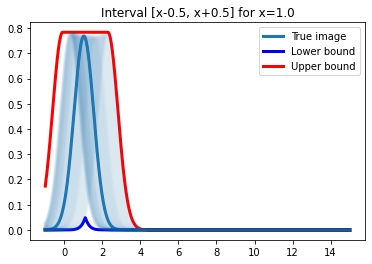

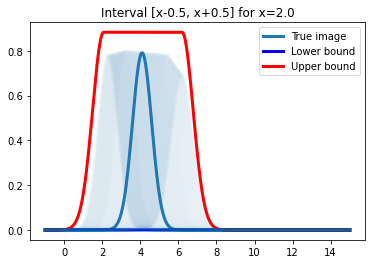

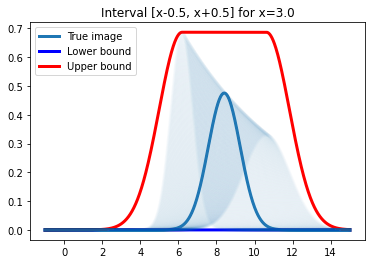

In [99]:
for j in [1.,2.,3.]:
    x = torch.tensor([[j]])
    eps=0.5
    x_int = Symbolic_interval(x-eps, x+eps)

    net_interval(x_int).scale


    y = torch.linspace(-1,15, 1000).reshape(-1,1)
    logp = net(x).log_prob(y).exp()
    logp_int = net_interval(x_int).log_prob(y).exp()


    plt.title(f"Interval [x-{eps}, x+{eps}] for x={j}")
    plt.plot(y,logp.detach(), lw=3)
    plt.plot(y,logp_int.l.detach(), lw=3, color="blue")
    plt.plot(y,logp_int.u.detach(), lw=3, color="red")
    plt.legend(["True image", "Lower bound", "Upper bound"])

    intervals = torch.linspace(float(x-eps), float(x+eps), 100)
    for i in intervals:
        plt.plot(y,net(torch.tensor([[i]])).log_prob(y).exp().detach(), alpha=0.03, lw=3, color="C0")


    plt.savefig(f"gaussian_ibp_{j}.svg")
    plt.savefig(f"gaussian_ibp_{j}.png")
    plt.show()
